Les différentes lois de probabilité avec Numpy
numpy.seed(5) : pour donner la graine, afin d'avoir des valeurs reproductibles d'un lancement du programme à un autre.

numpy.random.binomial(10, 0.3, 7) : une array de 7 valeurs d'une loi binomiale de 10 tirages avec probabilité de succès de 0.3.

numpy.random.poisson(1, 7) : une array de 7 valeurs issues d'une loi de Poisson de paramètre 1.

numpy.random.standard_normal(7) : une array de 7 valeurs issues d'une loi normale standard (moyenne 0, écart-type 1).

numpy.random.normal(5, 2, 7) : une array de 7 valeurs issues d'une loi normale de moyenne 5 et écart-type 2.

numpy.random.uniform(0, 2, 7): une array de 7 valeurs issues d'une loi uniforme entre 0 et 2.

binomiale=np.random.binomial(50, 0.3, 1000)



In [1]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np

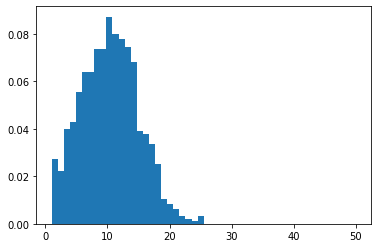

In [2]:
# sample a normal distribution
from numpy.random import normal

# define the distribution
mu=10
sigma=5
n=1000
# generate the sample
Normale = normal(mu, sigma, n)
Normale

# plot graph
plt.hist(Normale,bins=50,range=(1,50),density=True)
plt.show()

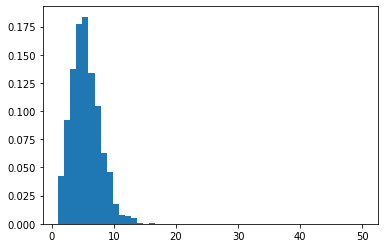

In [3]:
# sample a poisson distribution
from numpy.random import poisson

# define the distribution
lamda=5
n=1000

# generate the sample
Poisson = poisson(lamda, n)
Poisson

# plot graph
plt.hist(Poisson,bins=50,range=(1,50),density=True)
plt.show()

In [4]:
#plt.hist(binomiale,bins=50,range=(1,50),density=True)
#plt.show()

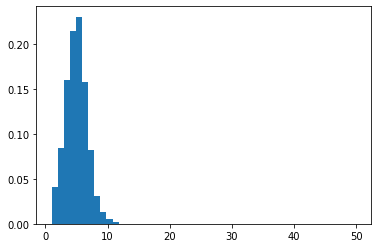

In [5]:
# sample a binomial distribution

from numpy.random import binomial
# define the distribution
p=0.3
n=1000
tirage=15
# generate the sample
Binomial = binomial(tirage, p, n)
Binomial

# plot graph
plt.hist(Binomial,bins=50,range=(1,50),density=True)
plt.show()

In [6]:
def DensiteNormale(x, mu, sigma):
    return 1/(sigma * sqrt(2*pi))*exp(-0.5*((x-mu) / sigma)**2)

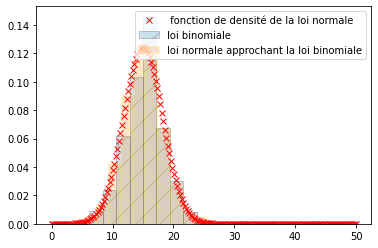

In [7]:
binomiale=np.random.binomial(50, 0.3, 1000)
normale=np.random.normal(15,3.2,1000)
plt.hist(binomiale,density=True,edgecolor='black', hatch='/' , alpha=0.2,  label='loi binomiale')
plt.hist(normale,density=True,edgecolor='yellow', hatch='x', alpha = 0.2 ,label ='loi normale approchant la loi binomiale')
lx=np.linspace(0,50,200)
ly=[DensiteNormale(x,15,3.2) for x in lx]
plt.plot(lx,ly,'rx', label = ' fonction de densité de la loi normale')
plt.legend(loc='upper right')
plt.show()

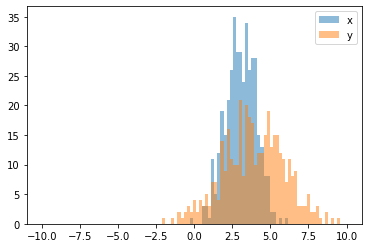

In [8]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x') # alpha correcpond à un coefficient de transparence
pyplot.hist(y, bins, alpha=0.5, label='y')

pyplot.legend(loc='upper right')
pyplot.show()

Simuler une variable aléatoire avec PYTHON.
Exercice 1. On lance un dé supposé équilibré.

Si le résultat est pair, on gagne 2€.
Si le résultat est 1, on gagne 3€.
Si le résultat est 3 ou 5, on perd 4€.
Soit X la variable aléatoire qui donne le gain du joueur.
Calculer l’espérance de X et indiquer si le jeu est favorable pour le joueur.
Calculer la variance.
Soit X la variable aléatoire qui donne le gain du joueur. X est définie sur l'ensemble {1,2,3,4,5,6}

X(1)=3, X(2)=2, X(3)=-4, X(4)=2, X(5)= -4, X(6) = 2

On obtient la loi de probablilité :

     xi 	-4	     2	     3
P(X)=xi 	 1/3 	 1/2 	 1/6 

In [9]:
X=[-4,2,3]
p=[1/3,1/2,1/6]

def esperance(valeurs,probabilites):
    e=0
    a= len(valeurs) # la longueur de la liste
    for i in range(a):
        e = e + probabilites[i]*valeurs[i] # somme des pi*xi
    return e


def variance(valeurs,probabilites):
    var,N = 0,0
    e=esperance(valeurs,probabilites)
    n=len(valeurs)
    for i in range(n):   
        var = var+probabilites[i]*(valeurs[i]-e)**2
    return var

 
def ecarttype(valeurs,probabilites):
    return sqrt(variance(valeurs,probabilites))

In [28]:
# Mise au point de deux méthodes de simulations. simul2 est une généralisation de simul1.

def simul(valeurs,probabilites):
    
    nb=random()        
    if 0<= nb < 1/3 :
        return valeurs[0] 
    elif 1/3<= nb < 1/3+1/2 :
        
        return valeurs[1] 
    else : return valeurs[2]

    
def simul2(valeurs,probabilites):
    
    assert len(valeurs) == len(probabilites)
    nb=random()
    curseur=0
    for i in range(len(valeurs)):
        
        if curseur<=nb<curseur+probabilites[i]:
            
            return valeurs[i]
        curseur=curseur+probabilites[i]

In [30]:
S1 = [simul(X,p) for i in range(40)]
S2 = [simul2(X,p) for i in range(40)]

TypeError: 'module' object is not callable

In [32]:
def echantillon(valeurs,probabilites,taille):
    listeX=[]
    for i in range(taille):
        listeX.append(simul(valeurs,probabilites))
    return listeX 

def echantillon2(valeurs,probabilites,taille):
    listeX=[]
    for i in range(taille):
        listeX.append(simul2(valeurs,probabilites))
    return listeX 



def frequences(valeurs,probabilites,taille):
    echanti=echantillon(valeurs,probabilites,taille)
    n=len(echanti)
    F=[]
    for x in valeurs:
        F.append(echanti.count(x)/n)
    return F

def frequences2(valeurs,probabilites,taille):
    echanti=echantillon2(valeurs,probabilites,taille)
    n=len(echanti)
    F=[]
    for x in valeurs:
        F.append(echanti.count(x)/n)
    return F

In [33]:
print(frequences(X,p,100))
print(frequences2(X,p,100))

TypeError: 'module' object is not callable

In [34]:
def moyenne(liste):
    return np.mean(liste)

In [35]:
moyenne(echantillon(X, p, 100))

TypeError: 'module' object is not callable

Écrire une fonction de paramètres (valeurs , probabilites , n , N) qui va simuler N échantillons de taille n de la variable aléatoire X (d’espérance μ et d’écart type σ) Si m désigne la moyenne de cet échantillon, la fonction devra renvoyer la proportion des cas où l’écart entre m et μ est inférieur ou égal à  2σ(√n)

In [36]:
mu=esperance(X,p)
sigma=ecarttype(X,p)
print(mu,sigma)

0.16666666666666674 2.967415635794143


In [37]:
# test sur 20 échantillons de taille 100

for i in range(20): 
    L=frequences(X,p,100)
    print(L,esperance(X,L),ecarttype(X,L))

TypeError: 'module' object is not callable

In [38]:
def ecart(valeurs,probabilites,taille,nbechantillons):
    mu=esperance(valeurs,probabilites)
    sigma=ecarttype(valeurs,probabilites)
    nbrecas=0
    for i in range(nbechantillons):
        L=frequences(valeurs,probabilites,taille)
        esperanceEchantillon=esperance(valeurs,L)
        if abs(esperanceEchantillon-mu)<=2*sigma / sqrt(taille): nbrecas=nbrecas+1
     
    return nbrecas/nbechantillons

def ecart2(valeurs,probabilites,taille,nbechantillons):
    mu=esperance(valeurs,probabilites)
    sigma=ecarttype(valeurs,probabilites)
    nbrecas=0
    for i in range(nbechantillons):
        L=echantillon2(valeurs,probabilites,taille)
        m=moyenne(L)
        if abs(m-mu)<=2*sigma / sqrt(taille): nbrecas=nbrecas+1
     
    return nbrecas/nbechantillons

In [42]:
def demo():
    X=[-4,2,3]
    p=[1/3,1/2,1/6]
    n=int(input("Entrer la taille de l'échantillon :"))
    mu,sigma=esperance(X,p),ecarttype(X,p)
    print("mu = %f , sigma = %f"%(mu,sigma))
    L=echantillon(X,p,n)
    print("Un échantillon : ", L)
    print("La moyenne de l'échantillon : ",moyenne(L))
    print("Les fréquences de l'échantillon", frequences(X,p,n))
    nb=int(input("Entrer le nombre d'échantillons souhaités :")) 
    
    print("La proportion dans l'intervalle : ", ecart2(X,p,n,nb))
   
    demo()